In [1]:
from src.lib.utils.FileHandling.FileHandlingInterface import *
from src.lib.SVCDSeg.SVCD import *
import matplotlib.pyplot as plt
import logging
import time
import warnings

In [2]:
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.DEBUG)
warnings.simplefilter("always", RuntimeWarning)

In [3]:
PASCAL_DEMO_IMAGE_PATH = r".\data\demoPascal\2008_003147.jpg"
PASCAL_DEMO_IMAGE_PATH1 = r".\data\demoPascal\2010_005258.jpg"

In [4]:
PASCAL_DEMO_SCRIBBLE_PATH = r".\data\demoPascal\2008_003147.xml"
PASCAL_DEMO_SCRIBBLE_PATH1 = r".\data\demoPascal\2010_005258.xml"

In [5]:
sample_image = TargetImage(
    PASCAL_DEMO_IMAGE_PATH           
)

In [6]:
sample_scribble = EncodedScribble(
    PASCAL_DEMO_SCRIBBLE_PATH
)

In [7]:
n_classes = sample_scribble.get_n_classes()

In [8]:
segmenter = SVCDSeg(
    n_classes,
    #alpha = 13.0, 
    #sigma = 18.0,
    max_iter = 2000,
    debug = 0
)

In [9]:
fitted_segmentation = segmenter.fit(
    sample_image,
    sample_scribble 
)

  0%|          | 1/2000 [00:03<1:42:10,  3.07s/it]

dtype float64


100%|██████████| 2000/2000 [06:30<00:00,  5.12it/s]


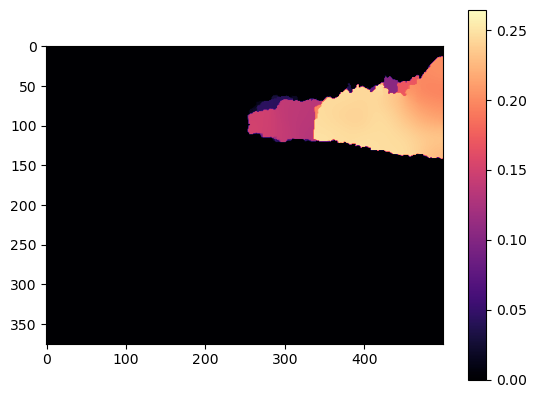

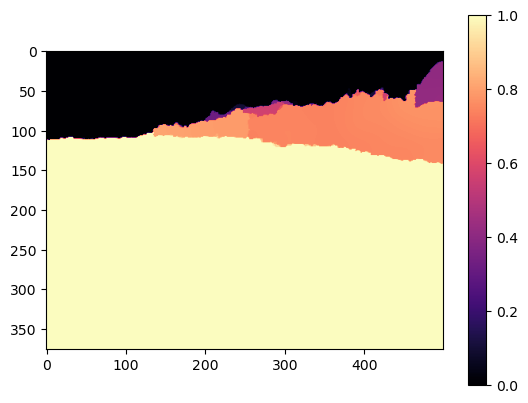

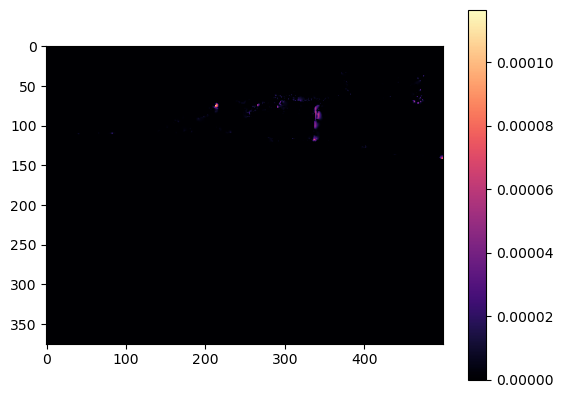

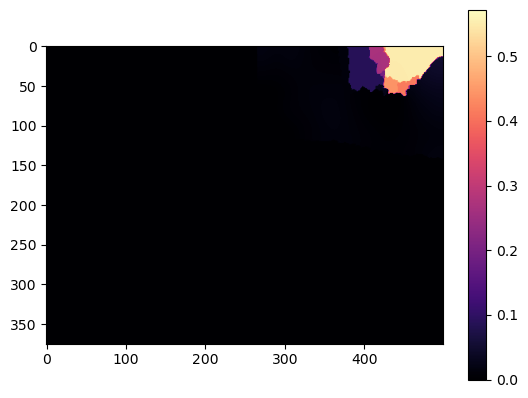

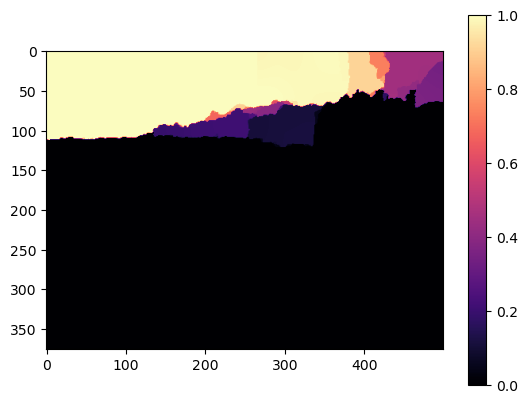

In [10]:
for segment in segmenter.theta:
    fig, ax = plt.subplots()
    vmin = np.min(segment)
    vmax = np.max(segment)
    im1 = ax.imshow(segment.transpose((1, 0)), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
    fig.colorbar(im1, ax=ax, label='')
    plt.show()

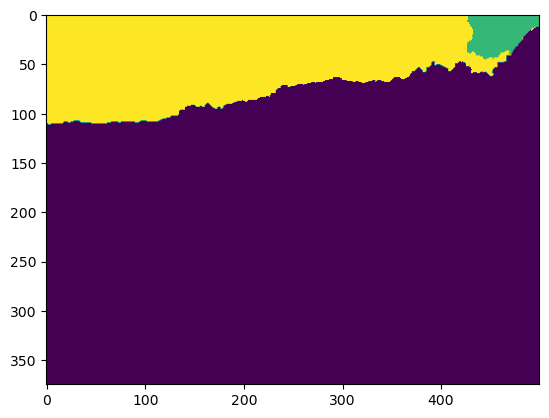

In [11]:
a = np.argmax(segmenter.theta, axis = 0)
plt.imshow(a.transpose(1, 0))

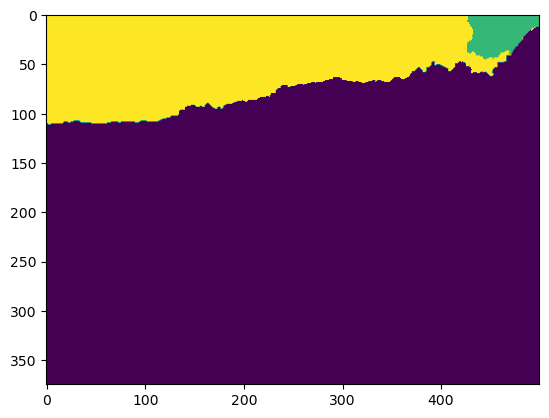

In [12]:
final_segmentation = np.argmax(segmenter.theta_history[-1], axis = 0).transpose(1, 0)
plt.imshow(final_segmentation)

In [13]:
segmenter.xi.shape

(2, 5, 500, 375)

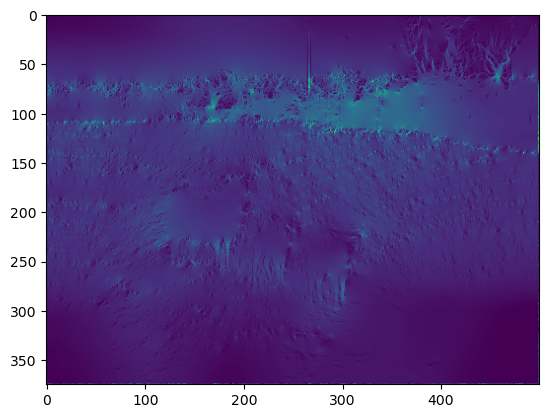

In [14]:
dual_vars = np.sum(segmenter.xi**2, axis = 0)
dual_vars = np.sqrt(dual_vars).transpose(2, 1, 0)
dual_vars = np.mean(dual_vars, axis = 2)
plt.imshow(dual_vars)

Text(0.5, 1.0, 'Dual energy history')

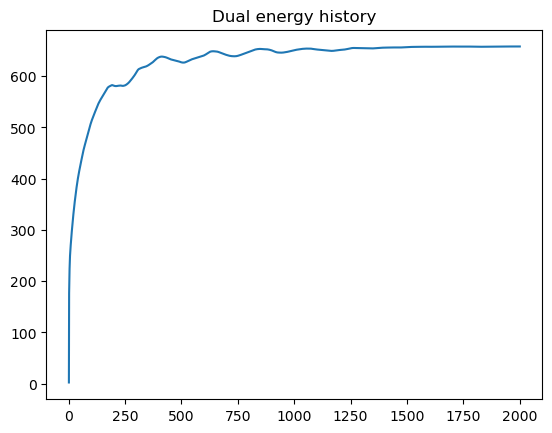

In [15]:
fig, ax = plt.subplots()

ax.plot(segmenter.dual_energy_history)
ax.set_title("Dual energy history")

Text(0.5, 1.0, 'Primal energy history')

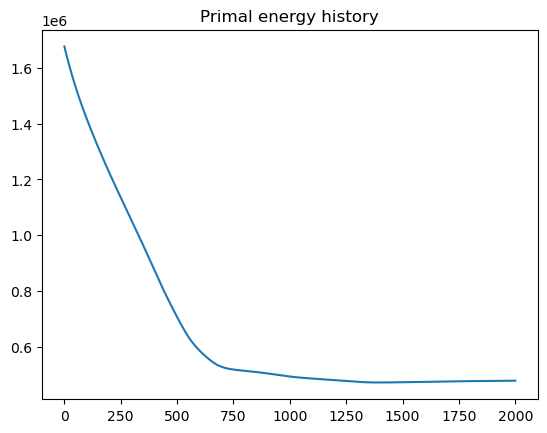

In [16]:
fig, ax = plt.subplots()
ax.plot(segmenter.energy_history)
ax.set_title("Primal energy history")


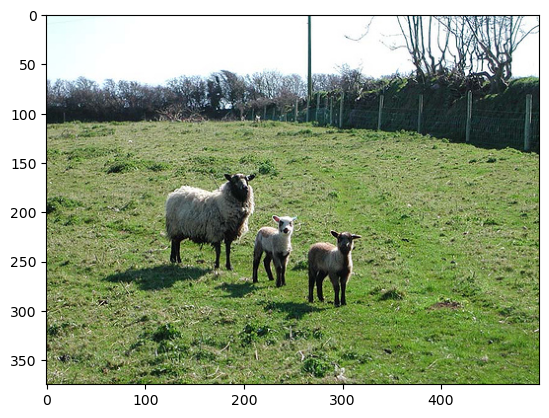

In [17]:
fig, ax = plt.subplots()
sample_image_array = sample_image.get_image_array()
sample_image_array.shape
ax.imshow(sample_image_array.transpose(2, 1, 0))

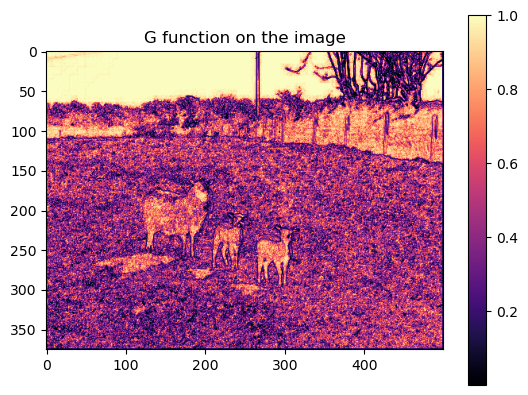

In [18]:
im_arr = sample_image.get_image_array()
im_shape = sample_image.get_image_shape()
segmenter.utils.make_derivative_matrix(*im_shape[1::-1])
#half_g = segmenter.utils.init_halfg(im_arr)
half_g = segmenter.halfg
_, w, h = half_g.shape
half_g = half_g.reshape(w, h)
half_g.shape
vmin = np.min(half_g)
vmax = np.max(half_g)

fig, ax = plt.subplots()

im1 = ax.imshow(half_g.transpose(1, 0), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
ax.set_title("G function on the image")
fig.colorbar(im1, ax=ax, label='')

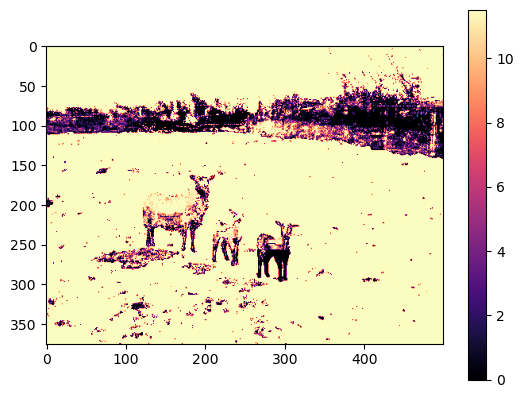

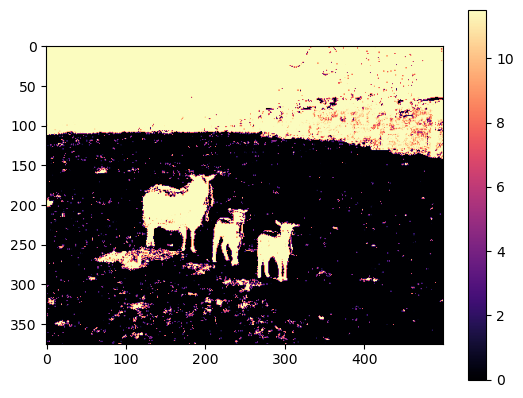

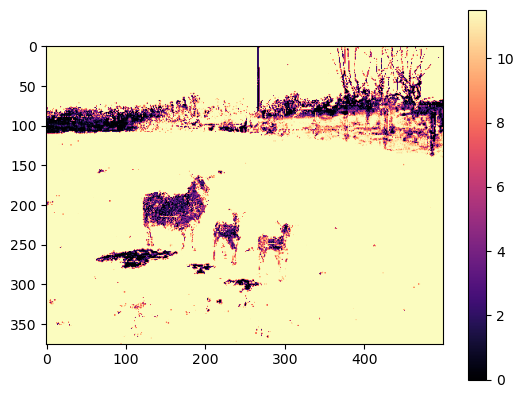

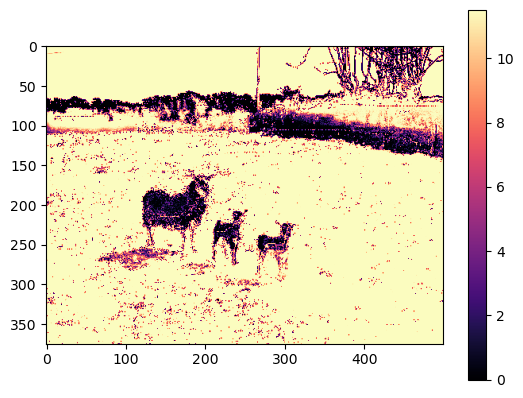

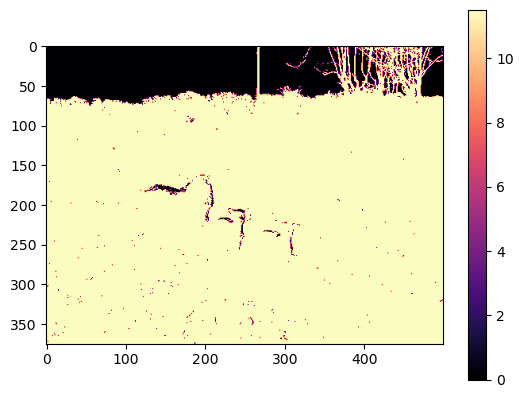

In [19]:
for likelihood in segmenter.fitted_likelihood:
    fig, ax = plt.subplots()
    vmin = np.min(likelihood)
    vmax = np.max(likelihood)
    im1 = ax.imshow(likelihood.transpose(1, 0), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
    fig.colorbar(im1, ax=ax, label='')